In [1]:
#Link for project - https://www.kaggle.com/competitions/playground-series-s3e24/overview
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/sahilagrawal/Documents/IT/machine learning/Project/DataSet/train.csv")
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [ ]:
print(len(df))
print(df.isnull().sum())

In [3]:
#Sampling the data
#For this using Stratified sampling since I want balance of the target variable smoking

from sklearn.model_selection import train_test_split

sampled_df, _ = train_test_split(df, train_size=0.15, stratify=df['smoking'], random_state=40)
print(len(sampled_df))

23888


# Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

# Drop the target variable 'smoking' and 'id' column from the sampled data
X = sampled_df.drop(columns=['smoking', 'id'])
y = sampled_df['smoking']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Now, X_standardized contains the standardized features, and you can use it to train a model.
df_std = pd.DataFrame(X_standardized, columns=X.columns)

In [24]:
#Applying model without feature selection and computing accuracy

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_standardized, y, test_size=0.2, random_state=40, stratify=y)

# Choosing a model. For demonstration, I'll use RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=40)

# Training the model
clf.fit(X_train, y_train)

# Predicting on validation set
y_pred = clf.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_val, y_pred))


Accuracy: 76.52%
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      2688
           1       0.71      0.79      0.75      2090

    accuracy                           0.77      4778
   macro avg       0.76      0.77      0.76      4778
weighted avg       0.77      0.77      0.77      4778



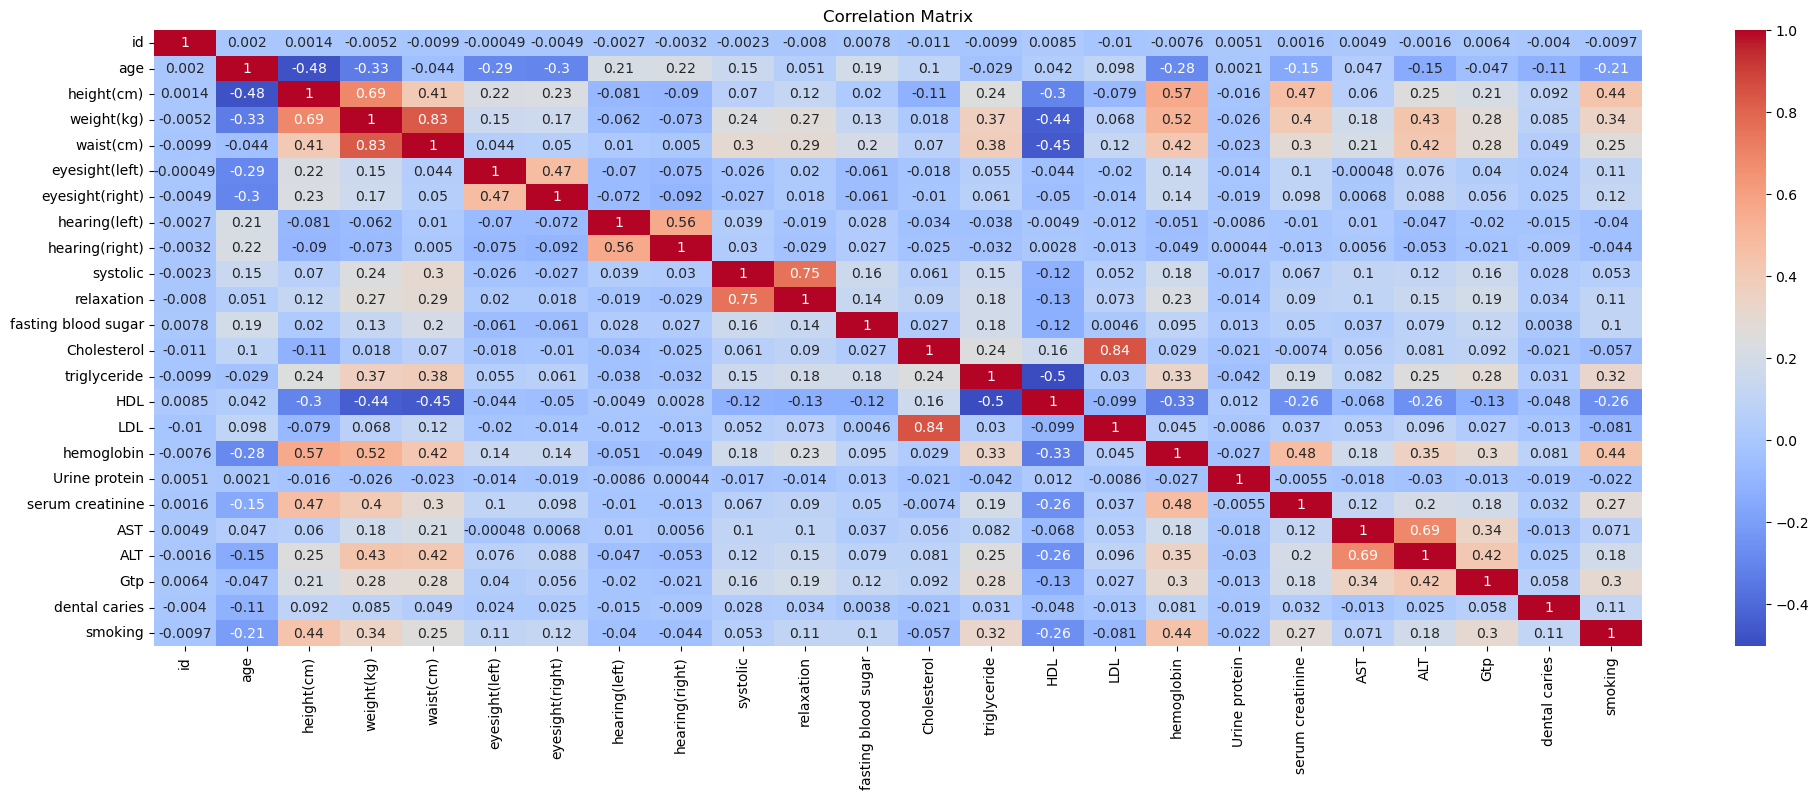

In [26]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = sampled_df.corr()
plt.figure(figsize=(24, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering (Introducing 4 more features)

In [31]:
# BMI
sampled_df['BMI'] = sampled_df['weight(kg)'] / (sampled_df['height(cm)']/100)**2

# Eyesight average
sampled_df['eyesight_avg'] = (sampled_df['eyesight(left)'] + sampled_df['eyesight(right)']) / 2

# AST to ALT ratio
sampled_df['AST_to_ALT_ratio'] = sampled_df['AST'] / sampled_df['ALT']

# Total Cholesterol
sampled_df['total_cholesterol'] = sampled_df['HDL'] + sampled_df['LDL']

sampled_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,eyesight_avg,AST_to_ALT_ratio,total_cholesterol
106377,106377,60,155,60,80.7,0.9,0.1,1,1,130,...,0.8,26,27,41,0,0,24.973985,0.50,0.962963,205
95237,95237,55,155,50,77.0,0.7,0.7,1,1,110,...,0.7,31,36,63,0,0,20.811655,0.70,0.861111,194
120129,120129,50,150,70,85.0,0.3,0.3,1,1,140,...,0.6,30,25,42,1,0,31.111111,0.30,1.200000,168
149985,149985,25,165,60,82.0,0.9,0.9,1,1,136,...,1.0,31,43,51,1,1,22.038567,0.90,0.720930,176
1081,1081,35,170,60,76.0,1.5,1.5,1,1,130,...,0.9,17,15,22,0,1,20.761246,1.50,1.133333,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49746,49746,65,160,50,77.0,0.6,0.5,1,1,120,...,0.5,20,12,12,0,0,19.531250,0.55,1.666667,189
15558,15558,40,155,55,68.9,0.6,1.2,1,1,107,...,0.7,12,11,10,0,0,22.892820,0.90,1.090909,150
103642,103642,40,155,50,72.0,0.8,0.7,1,1,130,...,0.8,25,20,13,1,0,20.811655,0.75,1.250000,164
158631,158631,40,170,50,74.0,1.5,1.2,1,1,130,...,0.9,26,21,45,1,1,17.301038,1.35,1.238095,157


# Standardizing New Features

In [30]:
features_to_standardize = ['BMI', 'eyesight_avg', 'AST_to_ALT_ratio', 'total_cholesterol']

scaler = StandardScaler().fit(sampled_df[features_to_standardize])
df_std[features_to_standardize] = scaler.transform(sampled_df[features_to_standardize])
df_std

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI,eyesight_avg,AST_to_ALT_ratio,total_cholesterol
0,1.320841,-1.175420,-0.569645,-0.257710,-0.282432,-2.435857,-0.154653,-0.159963,0.596215,0.124744,...,-0.211892,-0.519112,0.055617,0.025980,0.142129,-0.494919,0.161744,-1.580815,-0.362490,1.197188
1,0.898726,-1.175420,-1.367959,-0.672660,-0.821739,-0.813085,-0.154653,-0.159963,-0.981644,-0.761202,...,-0.211892,-1.083980,0.639297,0.613256,0.821077,-0.494919,-1.078375,-0.951864,-0.615742,0.819840
2,0.476611,-1.743971,0.228670,0.224529,-1.900353,-1.894933,-0.154653,-0.159963,1.385144,0.346230,...,-0.211892,-1.648847,0.522561,-0.104525,0.172990,2.020533,1.990232,-2.209766,0.226898,-0.072075
3,-1.633964,-0.038319,-0.569645,-0.111917,-0.282432,-0.272160,-0.154653,-0.159963,1.069573,0.014001,...,-0.211892,0.610624,0.639297,1.070026,0.450742,2.020533,-0.712830,-0.322914,-0.964299,0.202360
4,-0.789734,0.530232,-0.569645,-0.784809,1.335489,1.350612,-0.154653,-0.159963,0.596215,1.453662,...,-0.211892,0.045756,-0.995008,-0.757054,-0.444236,-0.494919,-1.093394,1.563938,0.061133,-0.415120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23883,1.742956,-0.606870,-1.367959,-0.672660,-1.091392,-1.354009,-0.154653,-0.159963,-0.192714,-0.761202,...,-0.211892,-2.213715,-0.644800,-0.952813,-0.752849,-0.494919,-1.459857,-1.423577,1.387255,0.648318
23884,-0.367619,-1.175420,-0.968802,-1.581064,-1.091392,0.539226,-0.154653,-0.159963,-1.218322,-1.093431,...,-0.211892,-1.083980,-1.578688,-1.018066,-0.814571,-0.494919,-0.458316,-0.322914,-0.044354,-0.689555
23885,-0.367619,-1.175420,-1.367959,-1.233403,-0.552085,-0.813085,-0.154653,-0.159963,0.596215,0.567716,...,-0.211892,-0.519112,-0.061119,-0.430790,-0.721987,2.020533,-1.078375,-0.794627,0.351222,-0.209293
23886,-0.367619,0.530232,-1.367959,-1.009106,1.335489,0.539226,-0.154653,-0.159963,0.596215,1.342919,...,-0.211892,0.045756,0.055617,-0.365537,0.265574,2.020533,-2.124324,1.092225,0.321621,-0.449424


# Feature selection

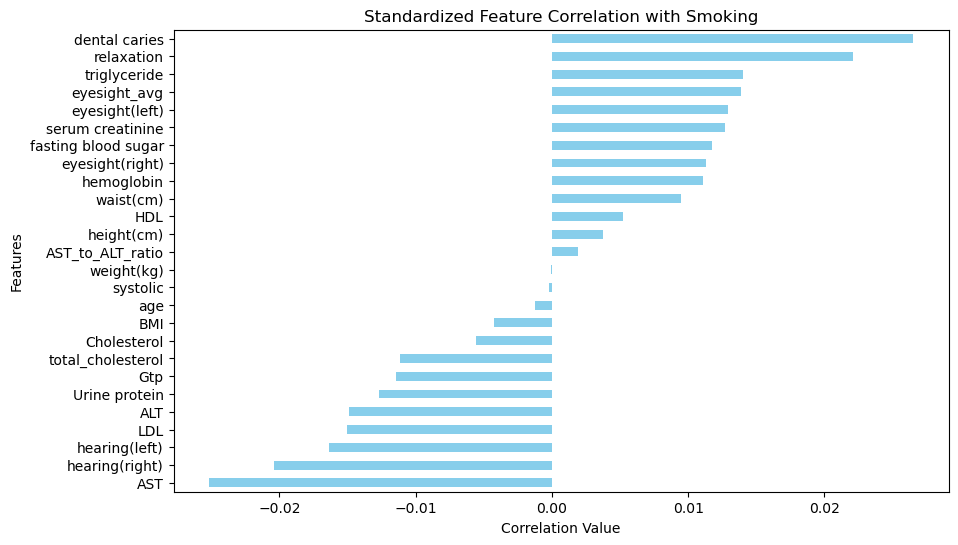

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Correlation matrix
correlations = df_std.join(sampled_df['smoking']).corr()['smoking'].drop('smoking')
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Standardized Feature Correlation with Smoking')
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.show()


# Not Working

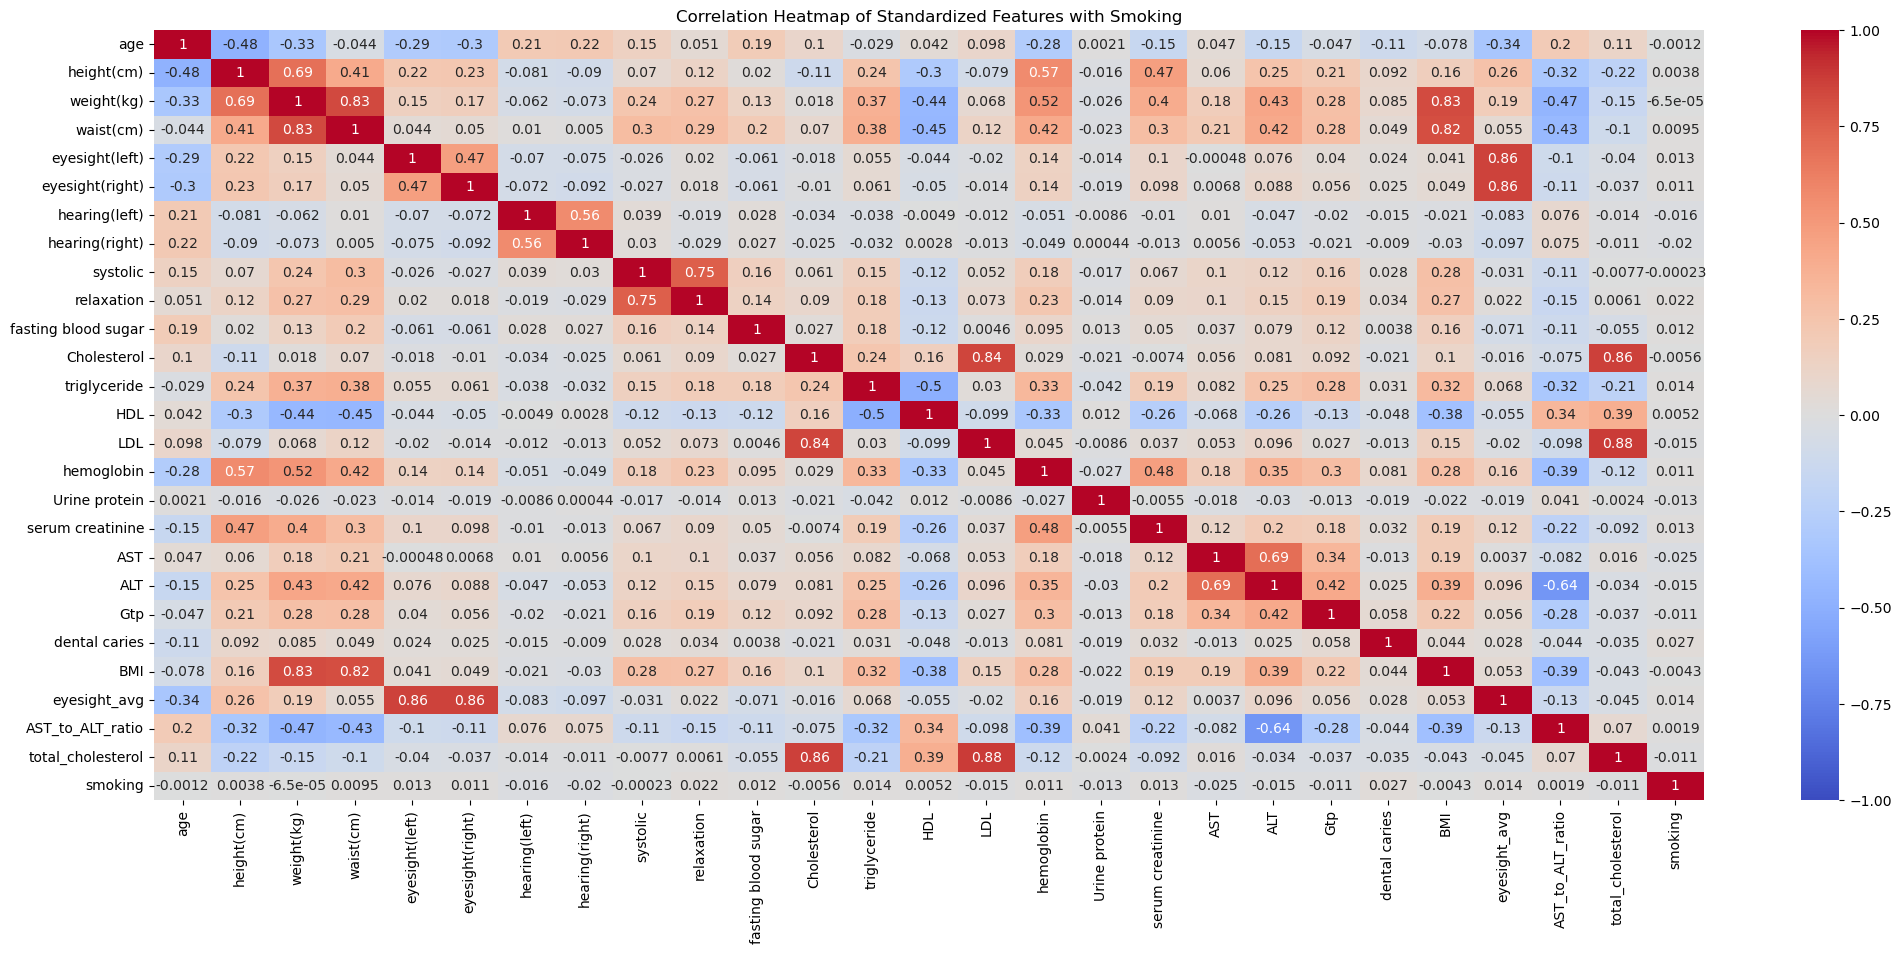

In [33]:
# Joining the standardized features with the target variable 'smoking'
df_full_standard = df_std.join(sampled_df['smoking'])
corr_matrix_standard = df_full_standard.corr()

# Plotting the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix_standard, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Standardized Features with Smoking')
plt.show()


# Feature Selection with Random Forest

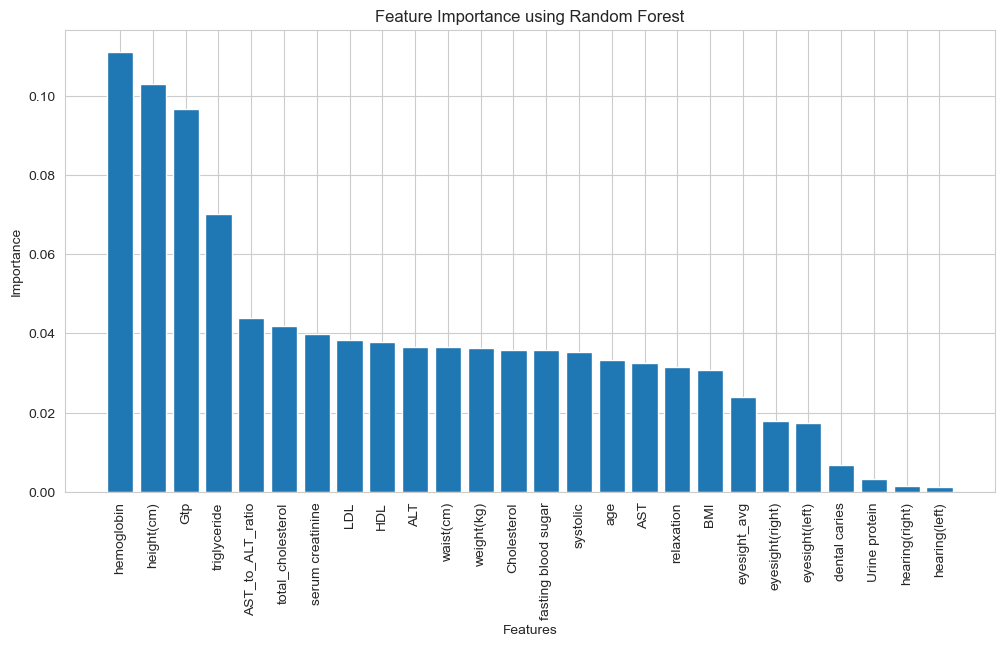

Top 10 important features: Index(['hemoglobin', 'height(cm)', 'Gtp', 'triglyceride', 'AST_to_ALT_ratio',
       'total_cholesterol', 'serum creatinine', 'LDL', 'HDL', 'ALT'],
      dtype='object')
(19110, 26)
(4778, 26)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_std  # This is the standardized data
y = sampled_df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=40)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort features based on importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xticks(X.columns[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

# Optionally, select the top-n features
n = 10  # You can change this value
top_n_features = X.columns[sorted_idx][:n]
print("Top {} important features: {}".format(n, top_n_features))
print(X_train.shape)
print(X_test.shape)


# Eval ROC curve for simple Random Forest model

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = clf.predict_proba(X_test)[:, 1]

#Computing the auc roc score
auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", auc)
X_test

ROC-AUC: 0.856814084570715
(19110, 26)
(4778, 26)


# Random Forest Model for top 10 features

In [72]:
X_selected = X[top_n_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=40)

#Building Model
clf_selected = RandomForestClassifier(n_estimators=100, random_state=40)
clf_selected.fit(X_train_selected, y_train)

#Model evaluation
y_pred_selected = clf_selected.predict_proba(X_test_selected)[:, 1]
roc_auc_selected = roc_auc_score(y_test, y_pred_selected)
print("ROC-AUC with Selected Features:", roc_auc_selected)
print(X_train.shape)
print(X_test.shape)


ROC-AUC with Selected Features: 0.8445370904813494
(19110, 26)
(4778, 26)


In [74]:
print(X_train.shape)
print(X_test.shape)


(19110, 26)
(4778, 26)


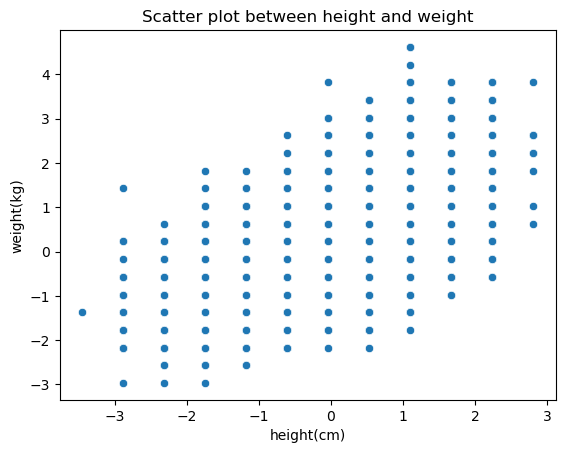

In [37]:
sns.scatterplot(x='height(cm)', y='weight(kg)', data=df_std)
plt.title('Scatter plot between height and weight')
plt.show()

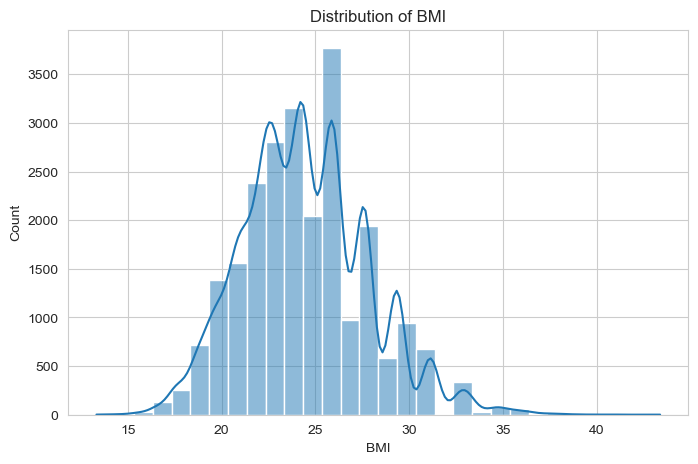

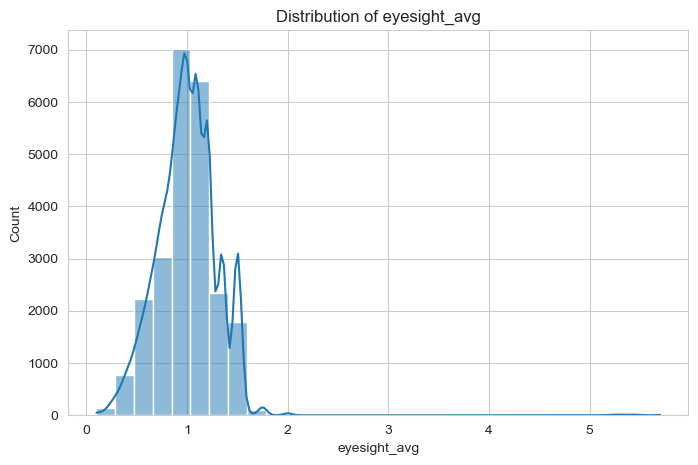

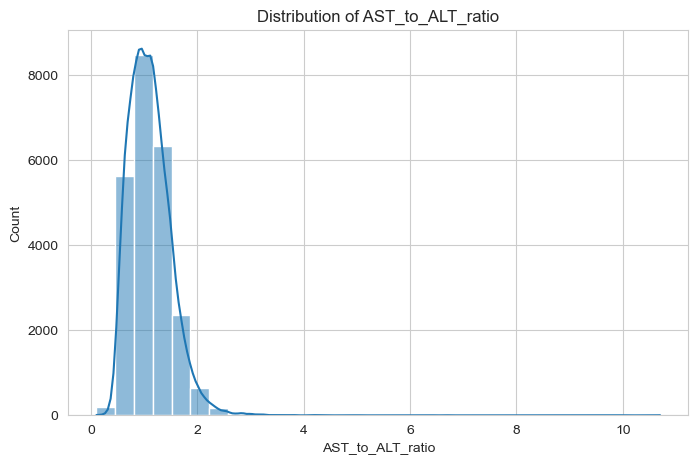

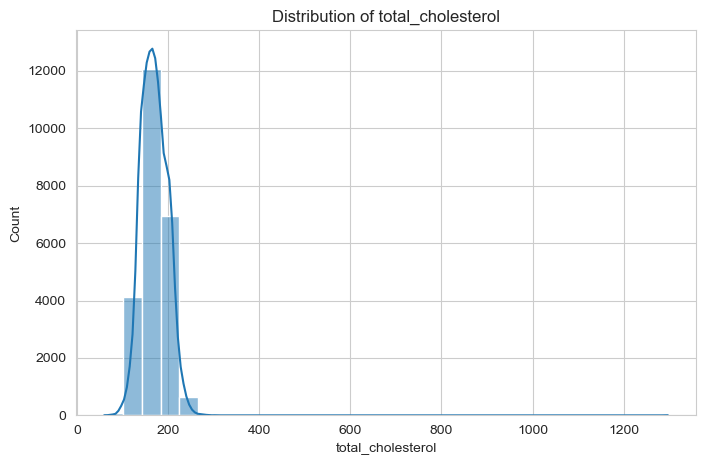

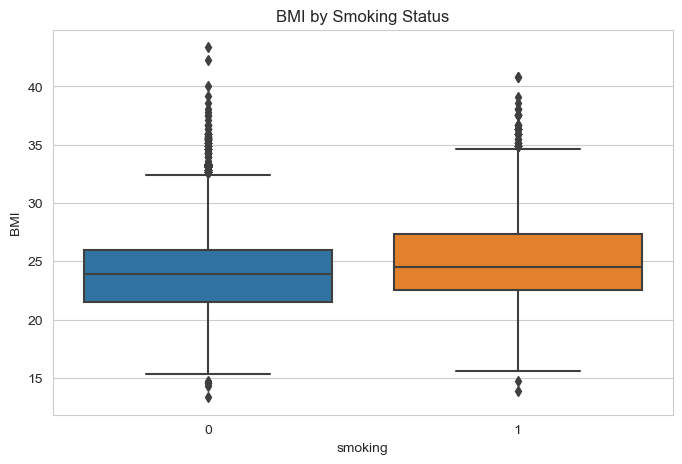

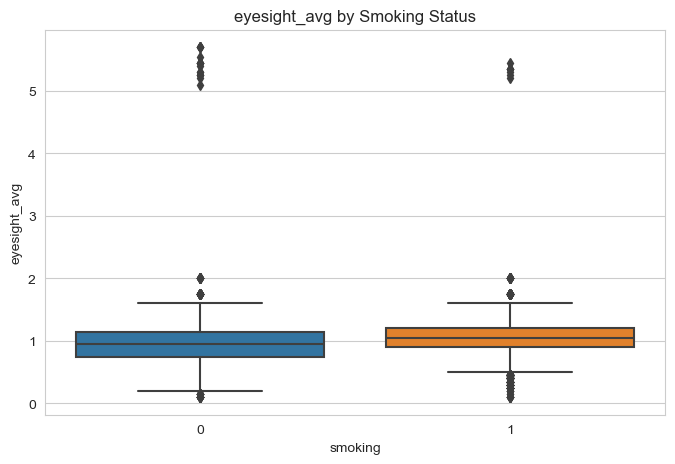

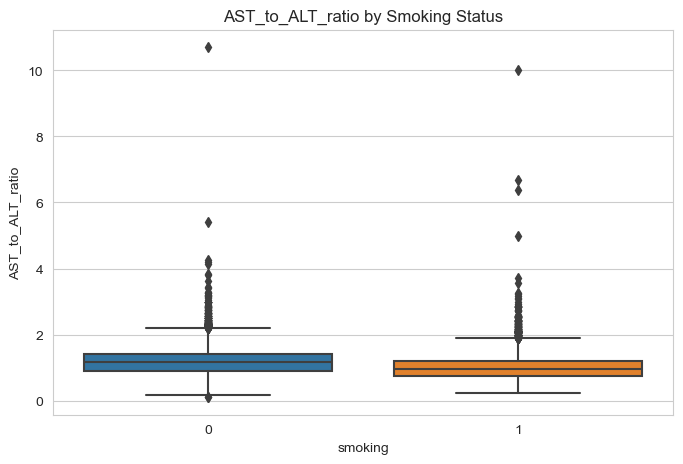

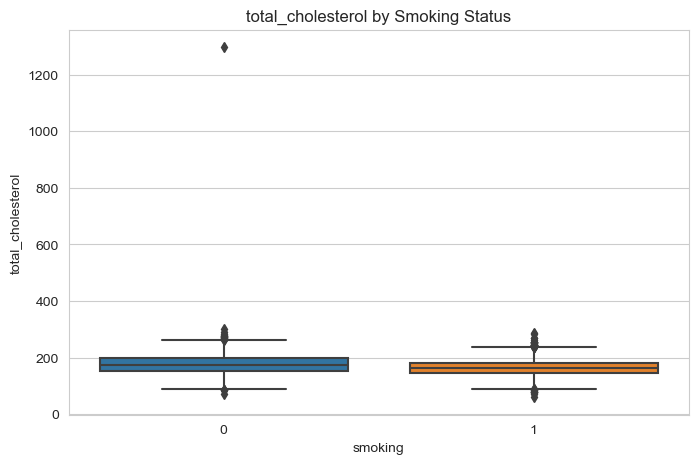

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Histograms
features = ['BMI', 'eyesight_avg', 'AST_to_ALT_ratio', 'total_cholesterol']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(sampled_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Boxplots against smoking
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='smoking', y=feature, data=sampled_df)
    plt.title(f'{feature} by Smoking Status')
    plt.show()


# Plotting Roc curve

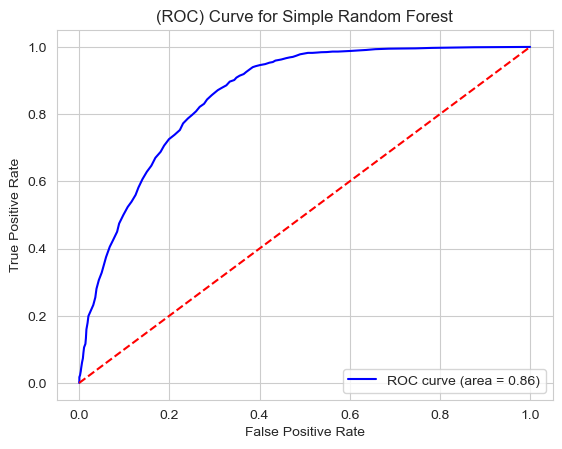

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Simple Random Forest')
plt.legend(loc='lower right')
plt.show()

# Optimizing hyperparameters (Very time consuming)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Use the best estimator for predictions
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict_proba(X_test)[:, 1]
print("ROC-AUC with Best Parameters:", roc_auc_score(y_test, y_pred_best))


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


/Users/sahilagrawal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 26 features, but RandomForestClassifier is expecting 55 features as input.

In [75]:
print(X_train.shape)
print(X_test.shape)


(19110, 26)
(4778, 26)


# Using Best Parameter to find ROC Curve

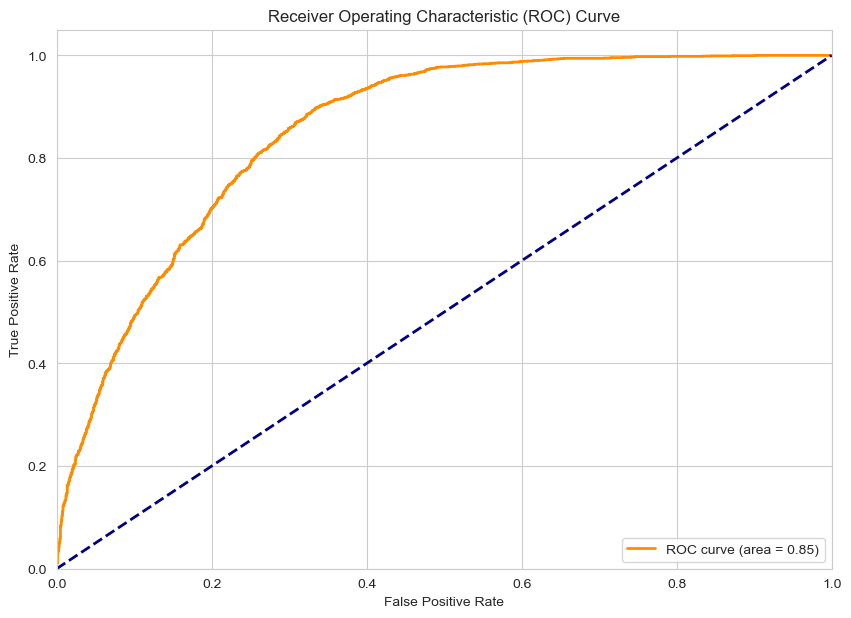

0.8524858071978779


In [78]:
# 1. Fit the model with the best parameters:
best_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best_clf = RandomForestClassifier(**best_params, random_state=40)
best_clf.fit(X_train, y_train)

# 2. Predict the probabilities:
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

# 3. Compute the ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 4. Plot the ROC curve:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(roc_auc_score(y_test, y_pred_prob))

# Using Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=40)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict_proba(X_test)[:, 1]
print("ROC-AUC with Gradient Boosting:", roc_auc_score(y_test, y_pred_gb))


ROC-AUC with Gradient Boosting: 0.846901504436135


# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=40, max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_log)
print(f"ROC-AUC Score for Logistic Regression: {roc_auc:.4f}")

# Generate a classification report
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

ROC-AUC Score for Logistic Regression: 0.8332
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2687
           1       0.70      0.72      0.71      2091

    accuracy                           0.74      4778
   macro avg       0.74      0.74      0.74      4778
weighted avg       0.74      0.74      0.74      4778



In [82]:
## Plotting The ROC Curve for logistic regression

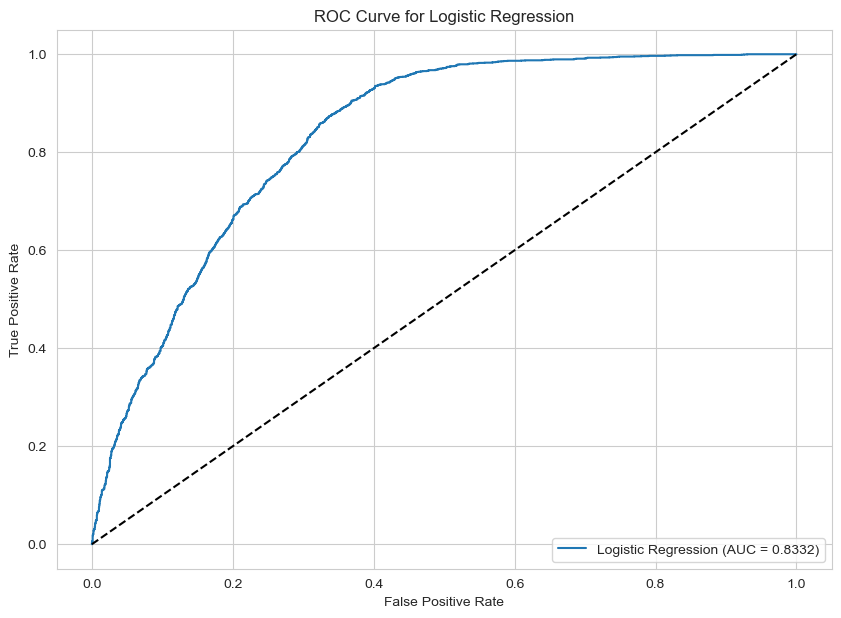

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()
